In [20]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Naive-Bayes/main/SpamClassifier-with-ML/sms_spam_data/SMSSpamCollection.csv",sep="\t",header=None,names=['labels','messages'])

In [21]:
df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
import string
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
#len(stopwords.words("english"))
stop_words = stopwords.words('english')

In [15]:
#stopwords.words("hinglish")

In [24]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

def remove_stopwords(text):
    words = text.split(' ')
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    return text


stemmer = PorterStemmer()
def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

In [25]:
def preprocess_data(text):
    text = clean_text(text)
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

df['messages'].apply(preprocess_data)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri  wkli comp win fa cup final tkt  ma...
3                     u dun say earli hor u c alreadi say
4               nah dont think goe usf live around though
                              ...                        
5567     time tri  contact u u £ pound prize  claim ea...
5568                              ü b go esplanad fr home
5569                             piti  mood soani suggest
5570    guy bitch act like id interest buy someth els ...
5571                                       rofl true name
Name: messages, Length: 5572, dtype: object

In [26]:
df

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

In [36]:
X = df['messages']
y=pd.get_dummies(df['labels'],drop_first=True)

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4457,), (1115,), (4457, 1), (1115, 1))

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

#fit_transform for train data
X_train_vec = vectorizer.fit_transform(X_train)

#transform for test data
X_test_vec = vectorizer.transform(X_test)

In [40]:
def evaluate_model(true, predicted):
    accuracy_score1 = accuracy_score(true, predicted)
    return accuracy_score1

In [42]:
models={
    'LogisticRegression':LogisticRegression(max_iter=1000),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'MultinomialNB':MultinomialNB()
}

trained_model_list=[]
model_list=[]
accuracy_score_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_vec,y_train)

    #Make Predictions
    y_pred=model.predict(X_test_vec)
    #print(y_pred.shape)
    #print(y_test.shape)
    accuracy_score1=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Accuracy score",accuracy_score1)

    accuracy_score_list.append(accuracy_score1)
    
    print('='*35)
    print('\n')

LogisticRegression
Accuracy score 0.9766816143497757


DecisionTreeClassifier
Accuracy score 0.9650224215246637


RandomForestClassifier
Accuracy score 0.9829596412556054


MultinomialNB
Accuracy score 0.9668161434977578




In [43]:
clf = MultinomialNB(force_alpha=True)
clf.fit(X_train_vec, y_train)

MultinomialNB(force_alpha=True)

In [44]:
y_pred=clf.predict(X_test_vec)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [45]:
accuracy_score=evaluate_model(y_test,y_pred)
print(accuracy_score)

0.9668161434977578


In [49]:
confusion_mat = confusion_matrix(y_test,y_pred)

In [50]:
confusion_mat

array([[966,   0],
       [ 37, 112]], dtype=int64)

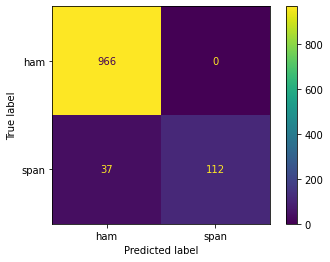

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['ham','span'])
disp.plot()